Using this Kaggle data (https://www.kaggle.com/anthonypino/melbourne-housing-market) create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
#original = pd.read_csv('D:\\Data\\melbourne-housing-market\\Melbourne_housing_extra_data-18-08-2017.csv')
original = pd.read_csv('C:\\Users\\mkennedy\\Documents\\GitHub\\Thinkful_Unit_3\\Melbourne\\Melbourne_housing_FULL-26-09-2017.csv')

In [3]:
data = original

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26/08/2017,27.2,3024.0,...,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26/08/2017,27.2,3024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26/08/2017,6.3,3013.0,...,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


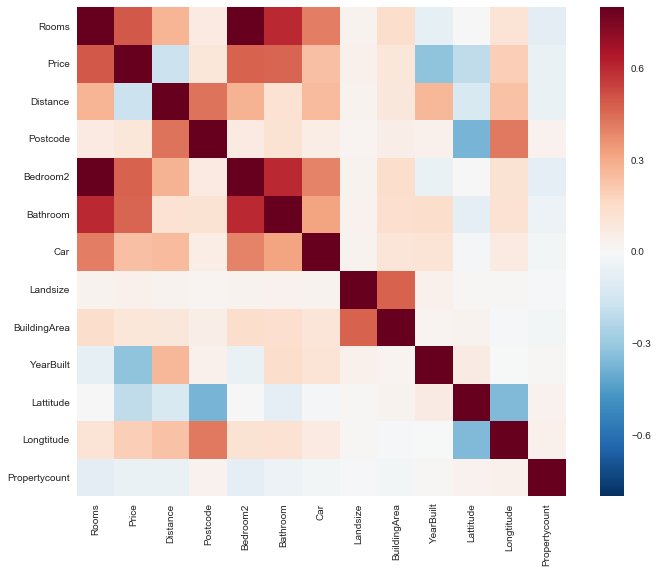

In [6]:
# Create a heatmap to compare the correlation of the columns.

corrmat = data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Cleaning the data

In [7]:
# Since there are a lot of columns around the area (address, zip, etc.), 
# find out which ones have the least amount of missing data.
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [8]:
# Since Suburb has no missing values, use this to represent general area.
# Drop other area-related columns
#data.drop(['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname'], axis=1)
drop_columns = data[['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname']]
#print(drop_columns)
data.drop(drop_columns, axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
# Converting Suburb into values based on categories
data['Suburb'] = data['Suburb'].astype('category')
data['Suburb'] = data['Suburb'].cat.codes
#data.head()
data['Suburb'].nunique()

336

In [10]:
# Converting dates to datetime64
data['Date'] = pd.to_datetime(data['Date'])
# Converting YearBuilt to datetime64
data['YearBuilt'] = pd.to_datetime(data['YearBuilt'])

In [11]:
# Converting each housing type into a binary value
data['house'] = False
data.loc[data['Type'] == 'h', 'house'] = True
data['unit'] = False
data.loc[data['Type'] == 'u', 'unit'] = True
data['townhouse'] = False
data.loc[data['Type'] == 't', 'townhouse'] = True

In [12]:
new_data = data[['Suburb', 'house', 'unit', 'townhouse', 'Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
new_data

,Suburb,house,unit,townhouse,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0,True,False,False,2,NaN,1.0,1.0,126.0,NaN,NaT
1,0,True,False,False,2,1480000.0,1.0,1.0,202.0,NaN,NaT
2,0,True,False,False,2,1035000.0,1.0,0.0,156.0,79.0,1970-01-01 00:00:00.000001900
3,0,False,True,False,3,NaN,2.0,1.0,0.0,NaN,NaT
4,0,True,False,False,3,1465000.0,2.0,0.0,134.0,150.0,1970-01-01 00:00:00.000001900
5,0,True,False,False,3,850000.0,2.0,1.0,94.0,NaN,NaT
6,0,True,False,False,4,1600000.0,1.0,2.0,120.0,142.0,1970-01-01 00:00:00.000002014
7,0,True,False,False,4,NaN,2.0,2.0,400.0,220.0,1970-01-01 00:00:00.000002006
8,0,True,False,False,2,NaN,1.0,2.0,201.0,NaN,1970-01-01 00:00:00.000001900
9,0,True,False,False,2,NaN,2.0,1.0,202.0,NaN,1970-01-01 00:00:00.000001900


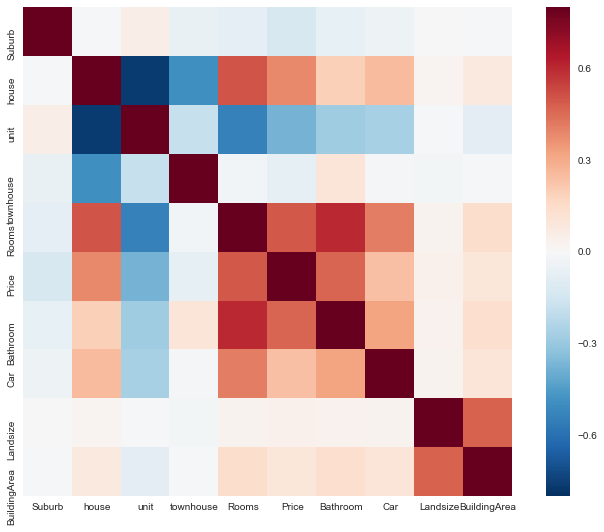

In [13]:
# Create a heatmap to compare the correlation of the columns.

corrmat = new_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Filling Missing Values
### Create a function that populates missing values by comparing them to values contained in a row of similar components. For example, a two bedroom, two bathroom townhouse with a missing price should have its price populated with the average price of other two bedroom, two bathroom townhouses. 

In [14]:
# Fill the missing Bathroom counts
fill_bathrooms = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms', 'Price'])['Bathroom'].apply(lambda x: x.fillna(x.mean()))
new_data['Bathroom'] = new_data.Bathroom.fillna(fill_bathrooms)

C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
new_data['Bathroom'].isnull().sum()

2

In [38]:
# Fill remaining Bathroom Counts
# bathrooms = new_data['Bathroom'].apply(lambda x: x.fillna(x.mean()))
# new_data['Bathroom'] = new_data.Bathroom.fillna(bathrooms)

new_data.Bathroom.dropna()

0        1.000000
1        1.000000
2        1.000000
3        2.000000
4        2.000000
5        2.000000
6        1.000000
7        2.000000
8        1.000000
9        2.000000
10       1.000000
11       2.000000
12       2.000000
13       2.000000
14       1.000000
15       1.000000
16       1.145469
17       1.000000
18       1.000000
19       1.145469
20       1.000000
21       1.145469
22       1.005376
23       2.000000
24       2.000000
25       2.000000
26       2.068697
27       1.005376
28       1.000000
29       1.000000
           ...   
23517    2.000000
23518    2.000000
23519    3.000000
23520    2.000000
23521    2.000000
23522    2.000000
23523    2.000000
23524    2.000000
23525    2.000000
23526    1.000000
23527    1.000000
23528    2.000000
23529    3.000000
23530    2.000000
23531    2.068697
23532    2.000000
23533    2.000000
23534    2.000000
23535    2.000000
23536    2.000000
23537    2.000000
23538    2.000000
23539    2.000000
23540    2.000000
23541    1

In [16]:
cleaned_car = data.groupby(['house', 'unit', 'townhouse', 'Rooms'])['Car'].apply(lambda x: x.fillna(x.mean()))
new_data['Car'] = new_data.Car.fillna(cleaned_car)

C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
new_data['Car'].isnull().sum()

3

In [40]:
# Drop na rows
new_data.Car.dropna()

0        1.000000
1        1.000000
2        0.000000
3        1.000000
4        0.000000
5        1.000000
6        2.000000
7        2.000000
8        2.000000
9        1.000000
10       0.000000
11       0.000000
12       1.000000
13       0.000000
14       2.000000
15       1.709061
16       1.194631
17       1.000000
18       2.000000
19       1.110606
20       1.000000
21       1.110606
22       0.892941
23       1.000000
24       2.000000
25       1.000000
26       2.073945
27       0.892941
28       1.000000
29       1.000000
           ...   
23517    2.000000
23518    2.000000
23519    3.000000
23520    2.000000
23521    2.000000
23522    3.000000
23523    2.000000
23524    2.000000
23525    2.000000
23526    1.000000
23527    1.000000
23528    3.000000
23529    2.000000
23530    6.000000
23531    2.073945
23532    1.000000
23533    2.000000
23534    1.000000
23535    2.000000
23536    0.000000
23537    2.000000
23538    2.000000
23539    4.000000
23540    1.000000
23541    5

In [17]:
cleaned_landsize = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms'])['Landsize'].apply(lambda x: x.fillna(x.mean()))
new_data['Landsize'] = new_data.Landsize.fillna(cleaned_landsize)

C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
new_data['Landsize'].isnull().sum()

396

In [42]:
# Drop na 
new_data.Landsize.dropna()

0         126.000000
1         202.000000
2         156.000000
3           0.000000
4         134.000000
5          94.000000
6         120.000000
7         400.000000
8         201.000000
9         202.000000
10        181.000000
11        245.000000
12       4292.000000
13        230.000000
14        256.000000
15        176.333333
17          0.000000
18        220.000000
19        977.000000
20        176.000000
21        977.000000
22          0.000000
23          0.000000
24        214.000000
25          0.000000
26        308.166667
27          0.000000
28        195.000000
29          0.000000
30        238.000000
            ...     
23517     773.545455
23518     986.000000
23519     696.000000
23520    1105.000000
23521     704.000000
23522     785.000000
23523     551.000000
23524     674.000000
23525     717.000000
23526     154.500000
23527     210.000000
23528     556.285714
23529     535.000000
23530     579.210526
23531     579.210526
23532     662.000000
23533     601

In [18]:
cleaned_buildingArea = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms'])['BuildingArea'].apply(lambda x: x.fillna(x.mean()))
new_data['BuildingArea'] = new_data.BuildingArea.fillna(cleaned_buildingArea)

C:\Users\mkennedy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
new_data['BuildingArea'].isnull().sum()

874

In [44]:
# Drop na
new_data.BuildingArea.dropna()

0         99.812500
1         99.812500
2         79.000000
3         78.000000
4        150.000000
5        126.875000
6        142.000000
7        220.000000
8         99.812500
9         99.812500
10        99.812500
11       210.000000
12        82.000000
13       147.000000
14       107.000000
15       126.875000
17        50.000000
18        75.000000
19        70.428571
20        80.000000
21        70.428571
22        50.000000
23        70.428571
24       190.000000
25        94.000000
26       157.800000
27        50.000000
28        99.812500
29        50.000000
30        97.000000
            ...    
23515    152.000000
23517    190.000000
23518    213.200000
23519    273.333333
23520    237.000000
23521    200.000000
23522    162.000000
23523    196.142857
23525    191.000000
23526     83.000000
23527     79.000000
23528    117.000000
23529    244.500000
23530    171.090909
23531    171.090909
23532    172.000000
23533    127.727273
23534    135.000000
23535    128.166667


In [19]:
cleaned_yearBuilt = data['YearBuilt'].apply(lambda x: x.fillna(x.median()))
new_data['YearBuilt'] = new_data.YearBuilt.fillna(cleaned_yearBuilt)

AttributeError: 'NaTType' object has no attribute 'fillna'

In [51]:
# Fill missing prices with the mean price
cleaned_price = data.groupby(['Suburb', 'house', 'unit', 'townhouse', 'Rooms'])['Price'].apply(lambda x: x.fillna(x.mean()))
new_data['Price'] = new_data.Price.fillna(cleaned_price)

TypeError: cannot convert the series to <class 'int'>

In [45]:
new_data['Price'].isnull().sum()

180

In [46]:
# Drop na
new_data.Price.dropna()

0        1.108318e+06
1        1.480000e+06
2        1.035000e+06
3        1.045500e+06
4        1.465000e+06
5        8.500000e+05
6        1.600000e+06
7        1.614250e+06
8        1.108318e+06
9        1.108318e+06
10       9.410000e+05
11       1.876000e+06
12       6.700000e+05
13       1.614250e+06
14       1.636000e+06
15       1.000000e+06
16       7.450000e+05
17       3.000000e+05
18       1.097000e+06
19       5.420000e+05
20       1.108318e+06
21       7.600000e+05
22       4.810000e+05
23       7.000000e+05
24       1.350000e+06
25       7.500000e+05
26       1.985000e+06
27       5.000000e+05
28       1.172500e+06
29       4.410000e+05
             ...     
23516    7.500000e+05
23517    1.295000e+06
23518    1.250000e+06
23519    1.316000e+06
23520    1.070344e+06
23521    9.510000e+05
23522    1.003300e+06
23523    1.323000e+06
23524    9.700000e+05
23525    1.330000e+06
23526    5.900000e+05
23527    6.500000e+05
23528    7.405714e+05
23529    7.500000e+05
23530    5

In [47]:
# Check to see if there are any remaining nulls
new_data.isnull().sum()

Suburb            0
house             0
unit              0
townhouse         0
Rooms             0
Price           180
Bathroom          2
Car               3
Landsize        396
BuildingArea    874
dtype: int64

In [31]:
new_data = new_data.drop(['YearBuilt'],1)

ValueError: labels ['YearBuilt'] not contained in axis

In [48]:
new_data.dropna()

,Suburb,house,unit,townhouse,Rooms,Price,Bathroom,Car,Landsize,BuildingArea
0,0,True,False,False,2,1.108318e+06,1.000000,1.000000,126.000000,99.812500
1,0,True,False,False,2,1.480000e+06,1.000000,1.000000,202.000000,99.812500
2,0,True,False,False,2,1.035000e+06,1.000000,0.000000,156.000000,79.000000
3,0,False,True,False,3,1.045500e+06,2.000000,1.000000,0.000000,78.000000
4,0,True,False,False,3,1.465000e+06,2.000000,0.000000,134.000000,150.000000
5,0,True,False,False,3,8.500000e+05,2.000000,1.000000,94.000000,126.875000
6,0,True,False,False,4,1.600000e+06,1.000000,2.000000,120.000000,142.000000
7,0,True,False,False,4,1.614250e+06,2.000000,2.000000,400.000000,220.000000
8,0,True,False,False,2,1.108318e+06,1.000000,2.000000,201.000000,99.812500
9,0,True,False,False,2,1.108318e+06,2.000000,1.000000,202.000000,99.812500


# Creating the Model and Determining the Best Explanatory Features
### Gradient Boosting will allow for the determination of the best explanatory features

In [49]:
# Trying PCA to find best explanatory features before trying Gradient Boost

X = new_data[['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea']]
Y = new_data['Price']

sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# To find best explanatory features, run the model with a dataset that has dropped any remaning na values
purged_data = new_data.dropna()
purged_data['Price'] = purged_data['Price'].astype(int)
print(len(purged_data))
X = purged_data[['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
Y = purged_data['Price']

In [ ]:
# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 90% of the data in the training set.
X_train, Y_train = X[:offset], Y[:offset]

# And put 10% in the test set.
X_test, Y_test = X[offset:], Y[offset:]

In [ ]:
# Create Gradient Boosting Classifier
params = {'n_estimators': 100,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train,Y_train)
y_pred = clf.fit(X_train,Y_train).predict(X_test)


# Print the accuracy of the model and store it in the table
print('Accuracy of the model:')
print(clf.score(X_test,Y_test))

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
X = new_data.drop('Price', 1)
Y = new_data['Price']